# Un ejemplo con visión artificial

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tabris2015/computer-vision-unifranz2021/blob/main/tensorflow/4.cv_example.ipynb)

En el anterior ejercicio, pudimos ver cómo crear una red neuronal para encontrar una relación entre 2 números. Obviamente, fue un poco obvio y un "overkill" usar una red neuronal para una función conocida. Pero el ejemplo es válido para entender el concepto de aprendizaje.

Por otro lado, considere ahora una tarea en la cual encontrar las reglas que definen la relación entre entradas - salidas es mucho más difícil, si no imposible. 

En este ejemplo, desarrollaremos una red neuronal que sea capaz de reconocer distintos tipos de vestimentas.

## Comencemos con el código

Comencemos importando tensorflow

In [20]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


El dataset Fashion MNIST está disponible en tensorflow por defecto.

In [21]:
mnist = tf.keras.datasets.fashion_mnist

Al invocar el método "load_data" obtendremos como resultado 2 tuplas con 2 arrays; éstas corresponden con los conjuntos de entrenamiento y pruebas para las imágenes y sus etiquetas.

In [22]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

print(f"train: {training_images.shape}")
print(f"test: {test_images.shape}")

train: (60000, 28, 28)
test: (10000, 28, 28)


Podemos echar un vistazo a algunos de los ejemplos en el conjunto de entrenamiento.

Experimente con distintos índices para visualizar el ejemplo.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

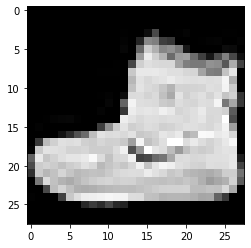

In [23]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray")
print(training_labels[0])
print(training_images[0])

Notará que todos los valores en las imágenes están entre 0 y 255. Para entrenar una red neuronal, por varias razones, es más fácil si normalizamos los valores en un rango entre 0 y 1.

In [24]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Se preguntará porqué hay 2 tipos de conjuntos... training y testing. En el ámbito del machine learning es común contar con un conjunto para entrenar el modelo y otro conjunto con ejemplos nunca vistos para poder evaluar el rendimiento y capacidad de generalización de nuestro modelo. Después de todo, el objetivo es implementar un modelo capaz de desempeñarse bien en ejemplos que nunca vió en el entrenamiento.

Comencemos a diseñar el modelo. Repasaremos algunos conceptos.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

2021-10-14 21:15:23.687479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-14 21:15:23.687908: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-14 21:15:23.687941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-14 21:15:23.687970: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-14 21:15:23.687997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

**Sequential**: Define una  SECUENCIA de capas en la red neuronal.

**Flatten**: Nótese que las imágenes tienen 2 dimensiones, para poder alimentar estos valores a la red necesitamos "aplanarlos" en un vector unidimensional.

**Dense**: Añade una capa de neuronas "densamente conectadas".

Cada capa de neuronas necesita una **función de activación**. Existen muchas opciones pero usaremos éstas por ahora:

**Relu** representa "If X>0 return X, else return 0", en otras palabras, solamente pasa valores positivos a la siguiente capa de la red. 

**Softmax** toma un conjunto de valores y los adecúa en una forma de distribución de probabilidad de tal forma que la sumatoria de todos sea igual a 1. Esto nos servirá para escoger el valor mayor en esta distribución que corresponderá con la predicción de la red.

Una vez el modelo está definido, se debe compilar el mismo. De similar manera al anterior ejemplo debemos especificar una función de costo y un optimizador. Luego podemos entrenar la red haciendo que se ejecute el bucle de entrenamiento por el número de épocas definido. En este caso, especificamos un argumento adicional para poder monitorear el rendimiento durante el entrenamiento.

In [26]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

2021-10-14 21:15:27.682723: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 2s 777us/step - loss: 0.4982 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.3732 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.3339 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 1s 767us/step - loss: 0.3110 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 1s 793us/step - loss: 0.2929 - accuracy: 0.8914


Una vez entrenado, deberá ver una medida de precisión al final de cada época. Debería tener un valor cercano a 0.91. Este valor se puede interpretar como una precisión del 91% en clasificar los datos de entrenamiento.

Considerando la sencillez de la red y el pequeño número de épocas, 91% de precisión es bastante bueno. Pero, cómo se comportará al predecir ejemplos nunca antes vistos? Podemos explorar esta posibilidad usando el método **model.evaluate** el cual toma un conjunto de ejemplos y evalúa el rendimiento de la red, en este caso sobre el conjunto de pruebas.


In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 474us/step - loss: 0.3403 - accuracy: 0.8803


[0.34029915928840637, 0.880299985408783]

Se debería obtener un valor cercano a 0.88, o el 88% de precisión. Como es esperado, el rendimiento no 
es tan bueno en ejemplos nunca antes vistos.

Acá algunos ejercicios de exploración:

# Ejercicios de exploración

### Ejercicio 1:
Ejecute la celda, el código crea un conjunto de predicciones para cada ejemplo en el conjunto de pruebas y luego imprime el resultado de la primera predicción. La salida, luego de correr la celda es una lista de valores. Qué representan esos números?

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

Pista: intente correr
```
print(test_labels[0])
```
y obtendrá un 9, qué ocurre con la predicción?

In [ ]:
print(test_labels[0])

A qué clase pertenece la predicción? 
Corresponde con la clase real?

Refiera a [este link](https://github.com/zalandoresearch/fashion-mnist#labels)

### Ejercicio 2*: 

Echemos un vistazo a las capas en nuestro modelo. Experimente con diferentes valores para la capa densamente conectada con 512 neuronas. Cuál es la diferencia en el costo final, tiempo de entrenamiento, etc.


In [29]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    #           MODIFICAR AQUI
                                    #                      V 
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.6.0
Epoch 1/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.4328 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 1s 597us/step - loss: 0.2538 - accuracy: 0.9288
Epoch 3/5
1875/1875 [==============================] - 1s 606us/step - loss: 0.2151 - accuracy: 0.9383
Epoch 4/5
1875/1875 [==============================] - 1s 600us/step - loss: 0.1945 - accuracy: 0.9440
Epoch 5/5
313/313 [==============================] - 0s 387us/step - loss: 0.1834 - accuracy: 0.9476
[1.20626944e-04 8.68184191e-10 3.72519535e-05 4.04968765e-03 5.25573978e-06 1.47331730e-05 2.37005887e-10 9.94940400e-01 1.36571680e-05 8.18524451e-04]
7


### Pregunta 1. Incremente a 1024 neuronas, cuál es el impacto?

1. El entrenamiento toma más tiempo, pero el modelo es más preciso
2. El entrenamiento toma más tiempo, pero el rendimiento no mejora
3. El entrenamiento toma el mismo tiempo, pero el modelo es más preciso


### Ejercicio 3: 

Qué pasa si elimina la capa Flatten()?

In [31]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                    # tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.6.0
Epoch 1/5


ValueError: in user code:

    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/losses.py:1738 sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/keras/backend.py:4956 sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4351 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/pepe/.virtualenvs/unifranz/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:4256 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


### Ejercicio 4: 

Qué pasa si agrega una capa oculta adicional entre la capa con 512 neuronas y la capa de salida?

In [32]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.6.0
Epoch 1/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.2264
Epoch 2/5
1875/1875 [==============================] - 2s 843us/step - loss: 0.0972
Epoch 3/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.0675
Epoch 4/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.0513
Epoch 5/5
313/313 [==============================] - 0s 470us/step - loss: 0.0874
[2.19893354e-10 6.70197039e-07 1.64830976e-06 1.24324215e-05 1.97194608e-10 7.04764136e-10 1.13160790e-13 9.99985099e-01 2.12401230e-09 6.01363510e-08]
7


### Ejercicio 5: 

Entrene con un número distinto de épocas. Qué pasa en tales casos?

In [34]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=40)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.6.0
Epoch 1/40
1875/1875 [==============================] - 1s 697us/step - loss: 0.2564 - accuracy: 0.9283
Epoch 2/40
1875/1875 [==============================] - 1s 727us/step - loss: 0.1122 - accuracy: 0.9664
Epoch 3/40
1875/1875 [==============================] - 1s 777us/step - loss: 0.0761 - accuracy: 0.9764
Epoch 4/40
1875/1875 [==============================] - 1s 717us/step - loss: 0.0559 - accuracy: 0.9828
Epoch 5/40
1875/1875 [==============================] - 1s 725us/step - loss: 0.0448 - accuracy: 0.9863
Epoch 6/40
1875/1875 [==============================] - 1s 719us/step - loss: 0.0345 - accuracy: 0.9895
Epoch 7/40
1875/1875 [==============================] - 1s 730us/step - loss: 0.0288 - accuracy: 0.9907
Epoch 8/40
1875/1875 [==============================] - 1s 734us/step - loss: 0.0227 - accuracy: 0.9929
Epoch 9/40
1875/1875 [==============================] - 1s 748us/step - loss: 0.0192 - accuracy: 0.9939
Epoch 10/40
1875/1875 [==============================] - 1

### Ejercicio 6: 

Qué pasa si no normaliza los datos? 

In [35]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.6.0
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.6428 - accuracy: 0.9062
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3506 - accuracy: 0.9339
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2983 - accuracy: 0.9404
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2886 - accuracy: 0.9445
Epoch 5/5
313/313 [==============================] - 0s 691us/step - loss: 0.3042 - accuracy: 0.9468
[0.0000000e+00 2.8508229e-37 8.2248783e-28 7.5694031e-27 6.8912054e-27 1.9030996e-34 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.2292836e-24]
7
